# Grain Growth 

This is the curvature effect related to grain boundary energy. 

We're going to model how one grain grows by consuming the other smaller grains. 

**Initial Profile** 
For intital profile, we are going to consider an isolated precipitate $\beta$ embedded in a matrix $\alpha$.

It will be a non-conserved grain structure with Perioidc Boundary Conditions 

**Phase Field Model**

- Step 1 : Order parameter is chosen to be $\phi$ - a non-conserved variable, defined as follows, 

$\phi$ = 0; in $\alpha$ phase
$\phi$ = 1; in $\beta$ phase

here 

$\frac{dR}{dt} \propto \frac{\gamma}{R}$ where R = radius of the embedded grain

- Step 2 : Free energy functional. The free energy functional is defined as

$\mathscr F = \int F dV$ 

where $F$ = $f_{0}(\phi) + \kappa|\nabla \phi|^{2}$ and $f_{0} = A\phi^{2}(1-\phi)^{2}$

- Step 3 & 4 : Since there's a non - conserved variable involved we are going to use the Allen-Cahn Equation and solve it using Fourier Transform. 

In [1]:
# importing libraries 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import pyplot as plt, cm

%matplotlib inline 

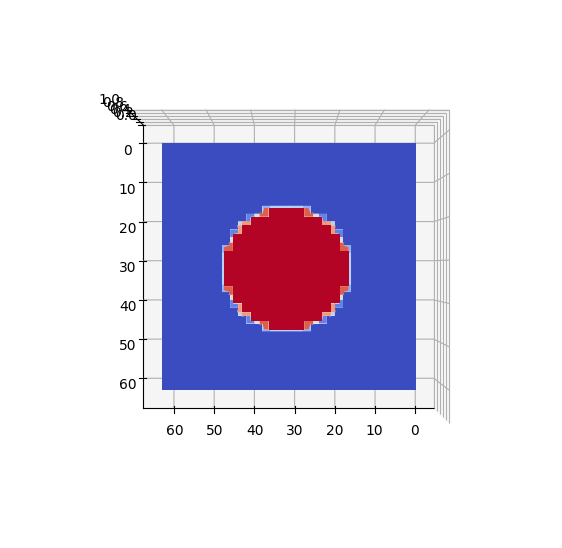

In [2]:
# defining parameters

# non-dimensionalized constants
kappa = 1.0
A = 1.0
L = 1.0
kx = 1.0
ky = 1.0

# no.of grid points 
Nx = 64 
Ny = 64 
halfNx = Nx/2
halfNy = Ny/2

dt = 0.5 # time-step

# reciprocal space grid variables
delkx = 2 * np.pi / Nx
delky = 2 * np.pi / Ny

R = 15.0 # radius of the embedded ppt
R2 = R * R

x = np.arange(0,Nx,1)
y = np.arange(0,Ny,1)

X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx,Ny)) # 2 D phi vector

# setting up the initial profile
for i in range (0,Nx) :
    for j in range (0,Ny) :
        parameter = (i-halfNx)**2 + (j-halfNy)**2
        if (parameter < R2):
            phi[i][j] = 1.0
        else:
            phi[i][j] = 0.0

# plotting the intital profile
fig = plt.figure(figsize=(7,7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, phi[:],cmap=cm.coolwarm) 
ax.view_init(90,90)              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


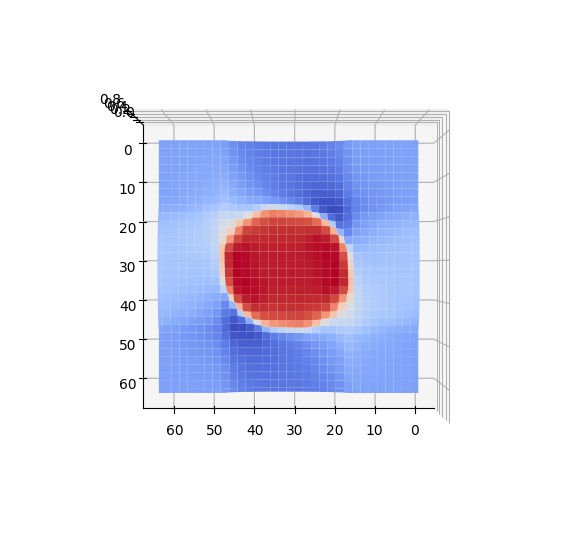

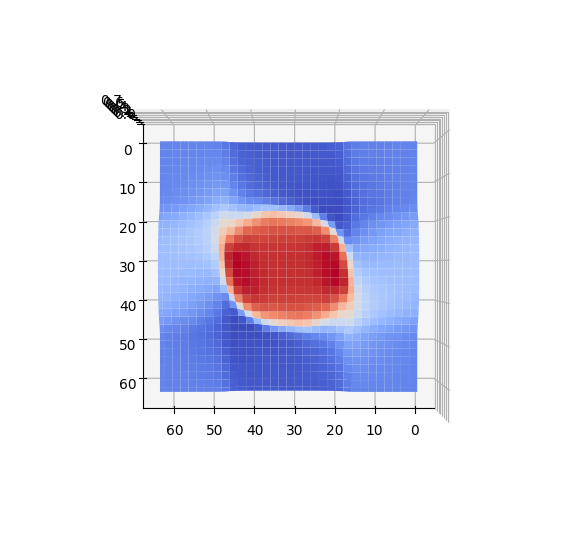

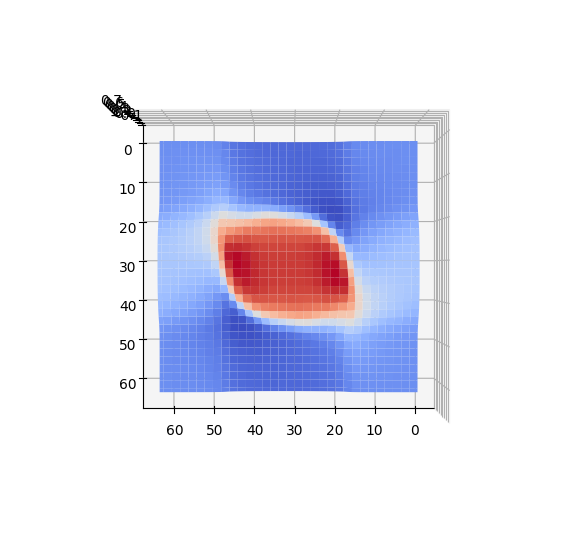

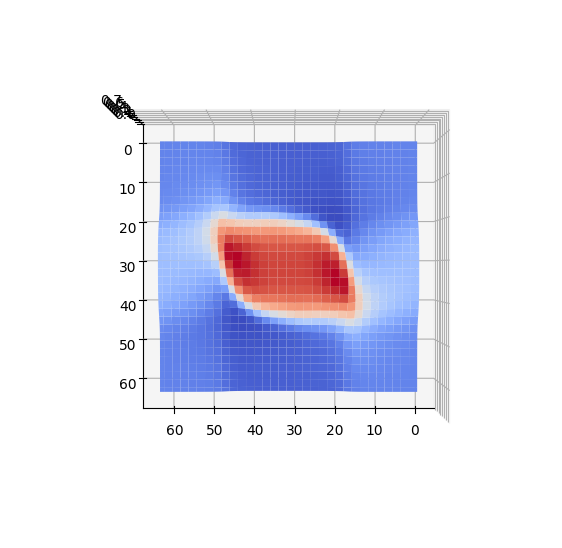

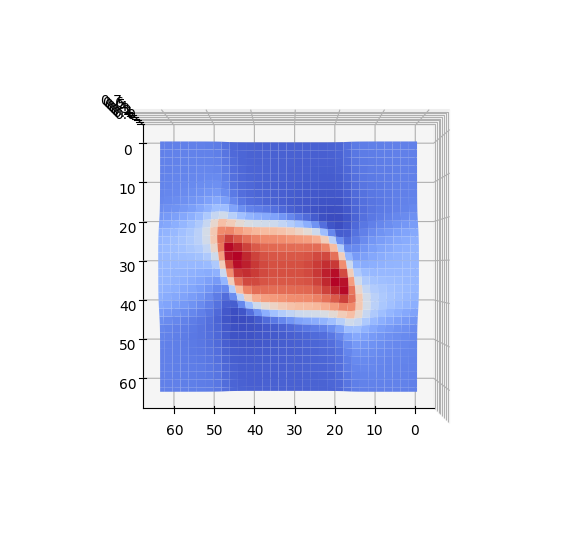

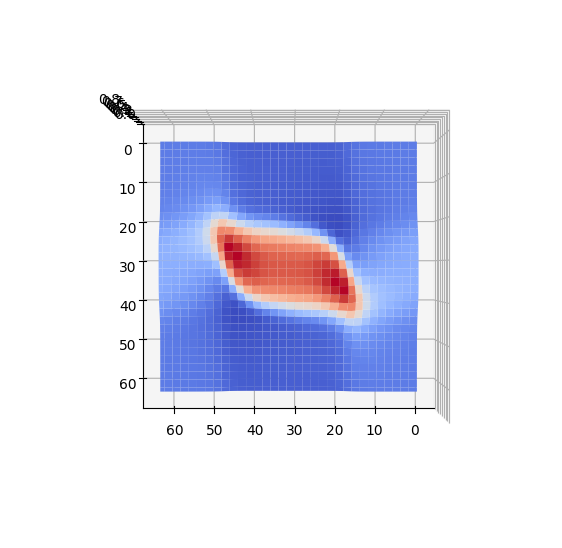

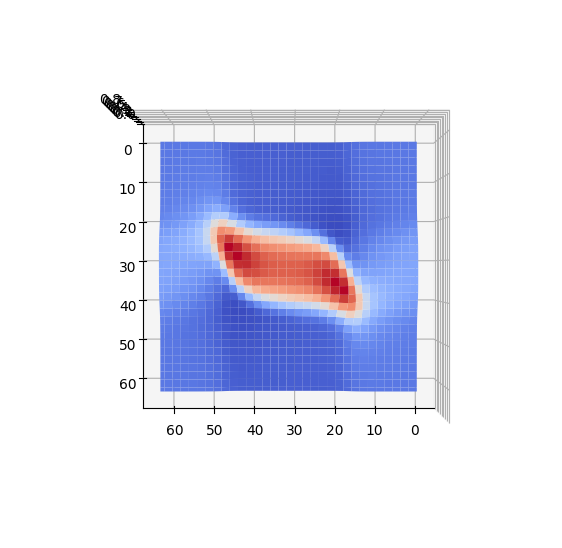

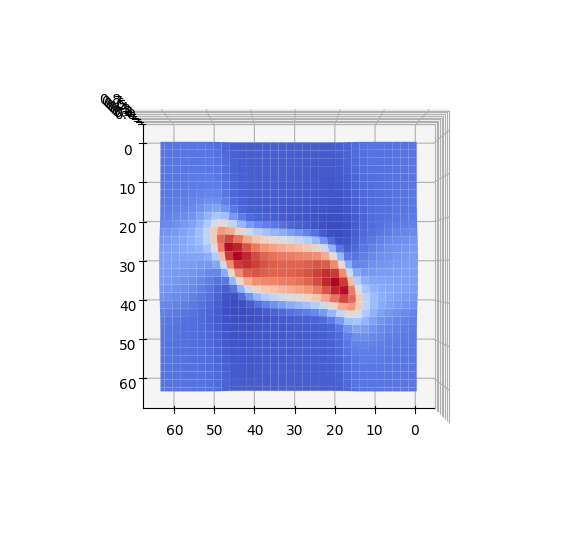

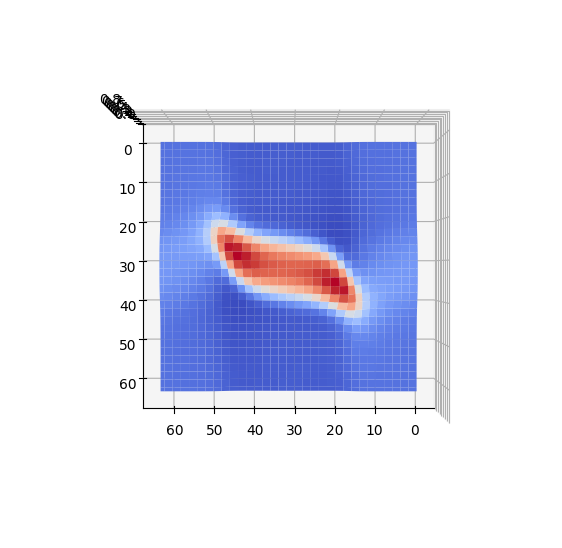

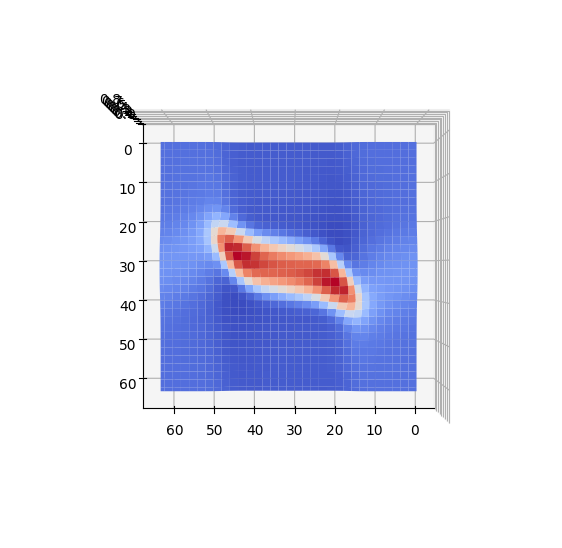

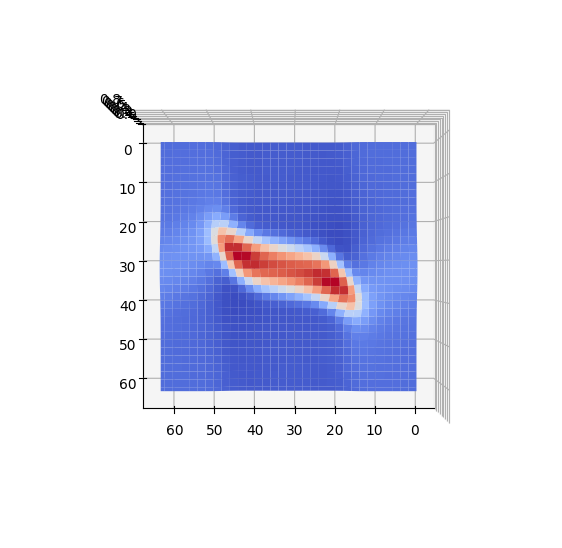

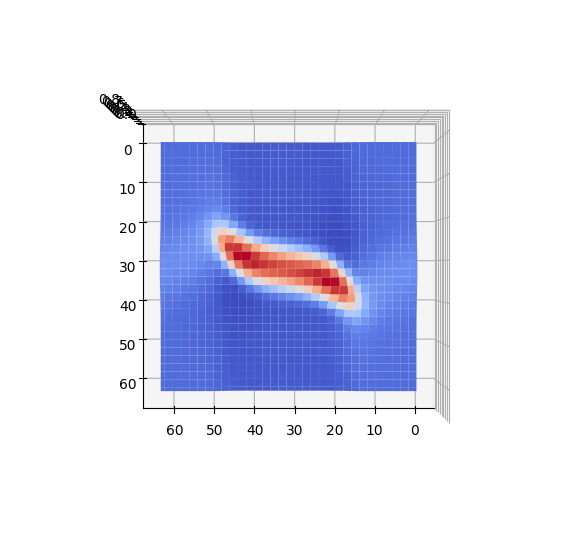

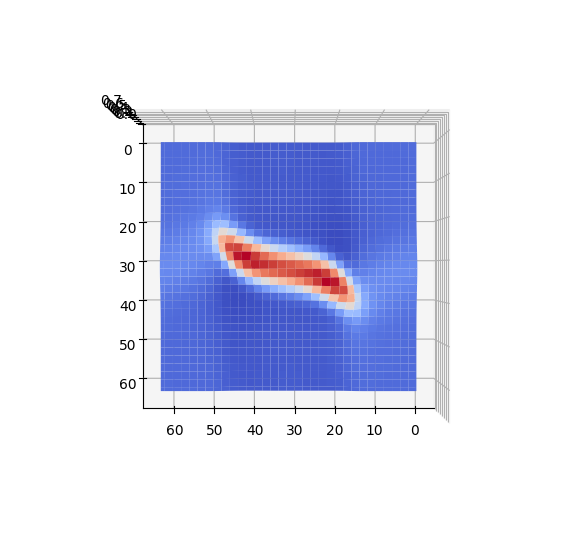

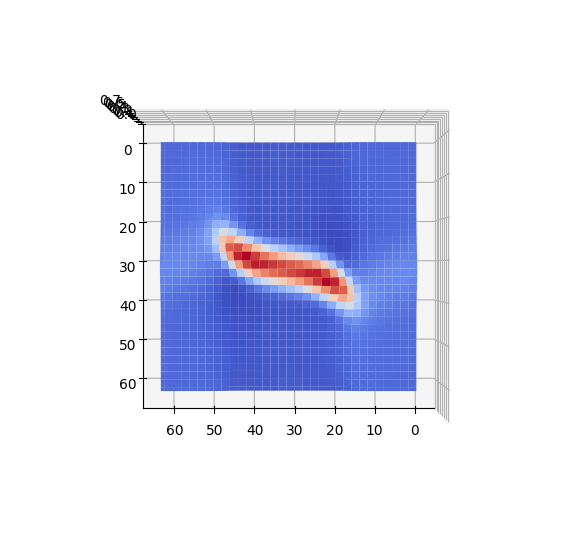

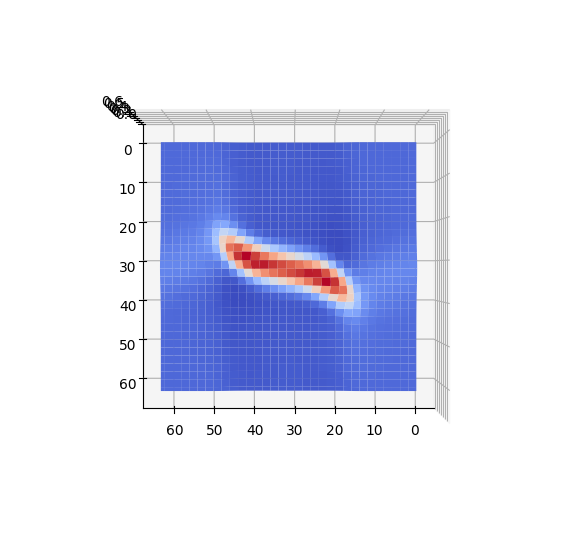

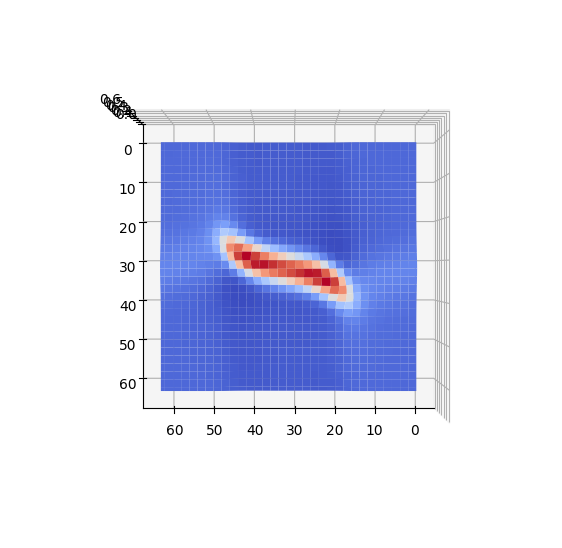

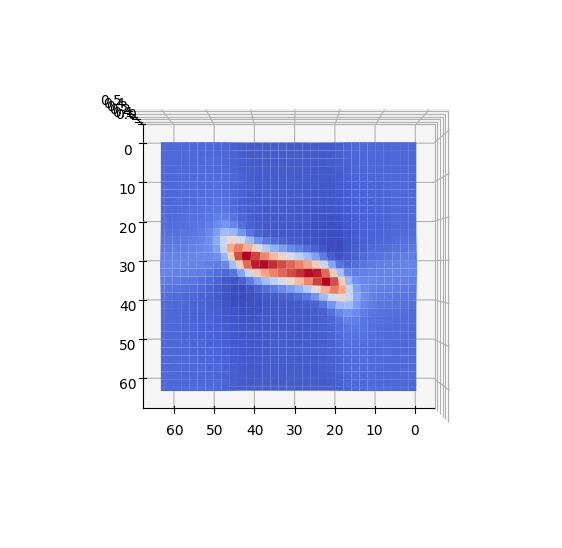

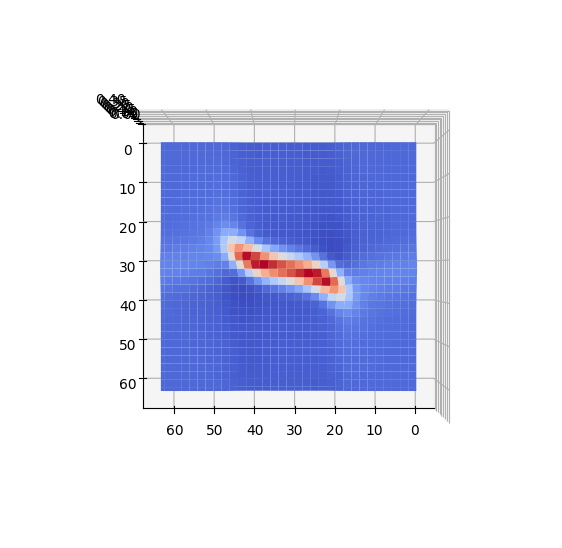

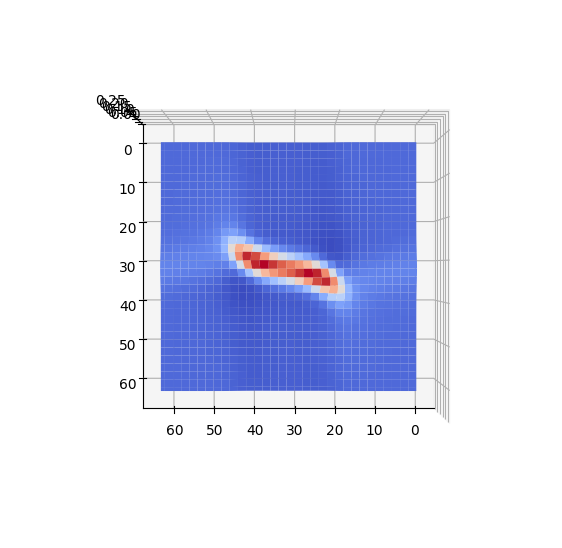

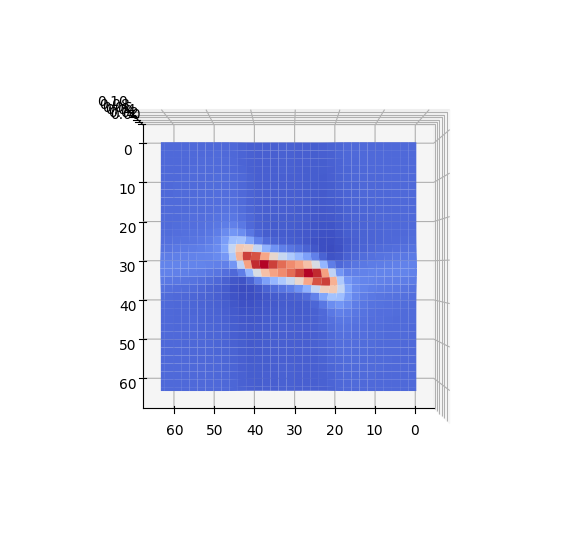

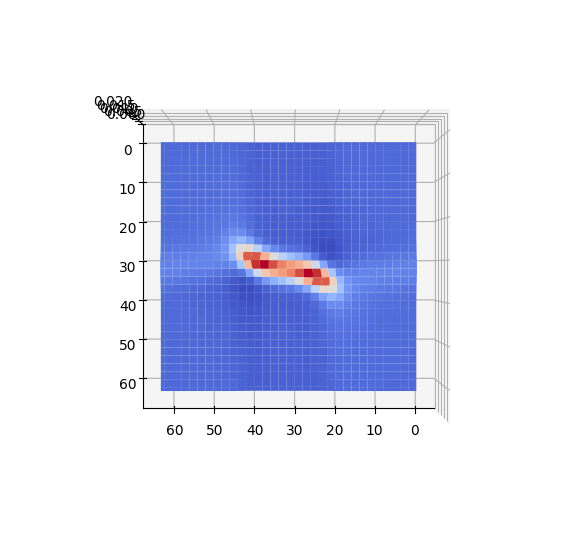

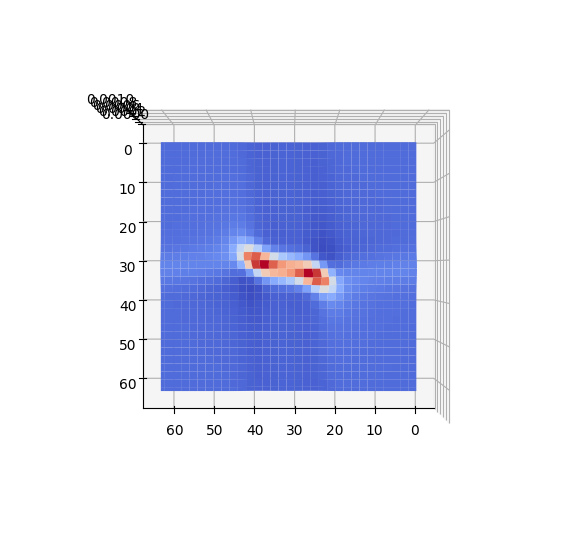

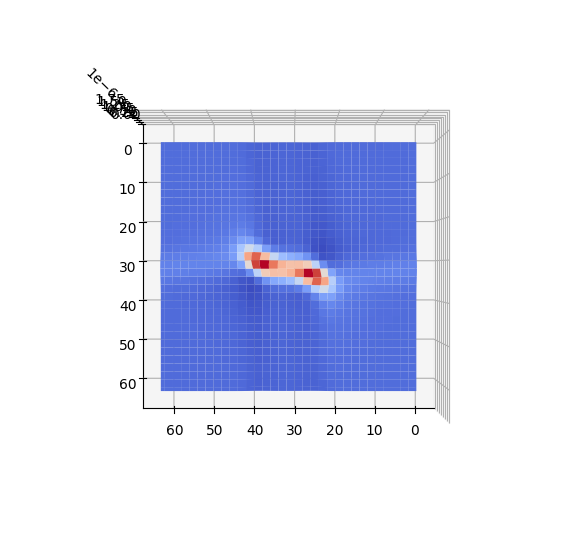

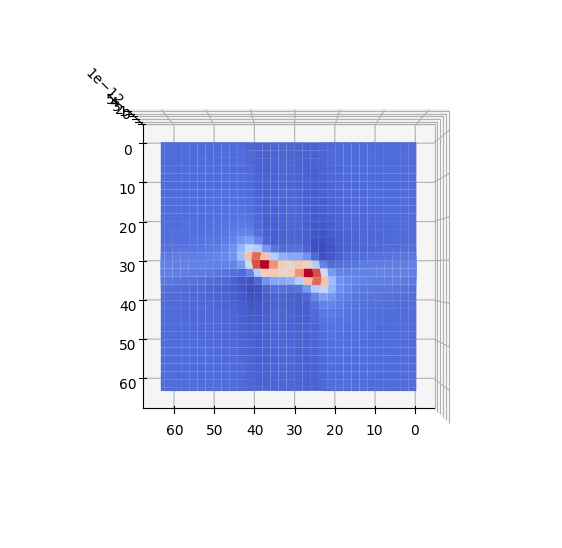

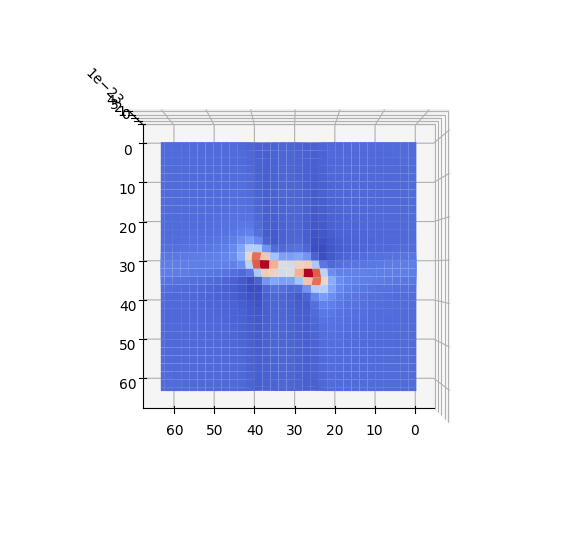

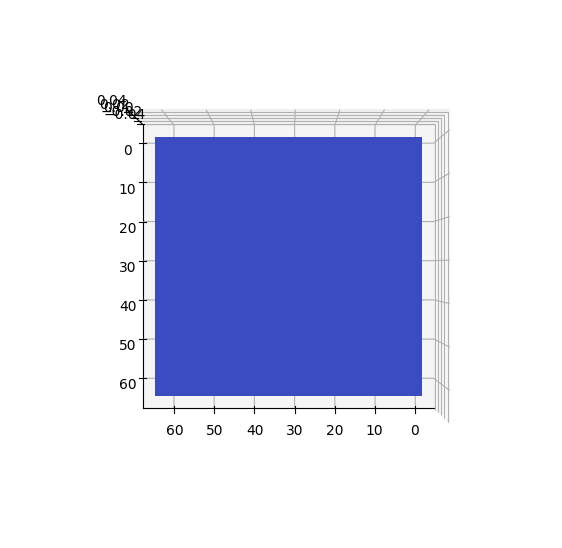

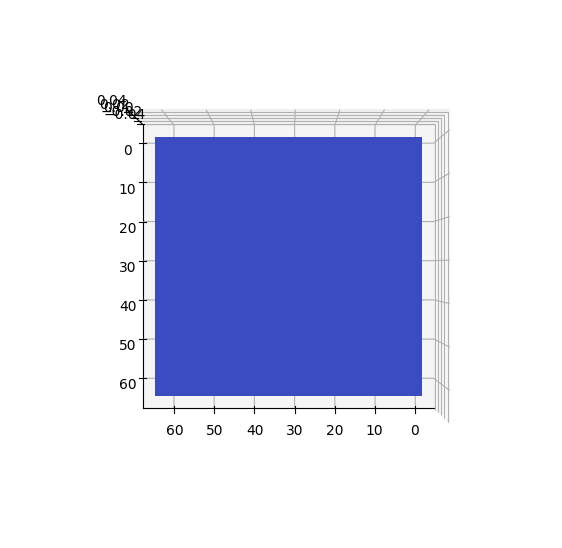

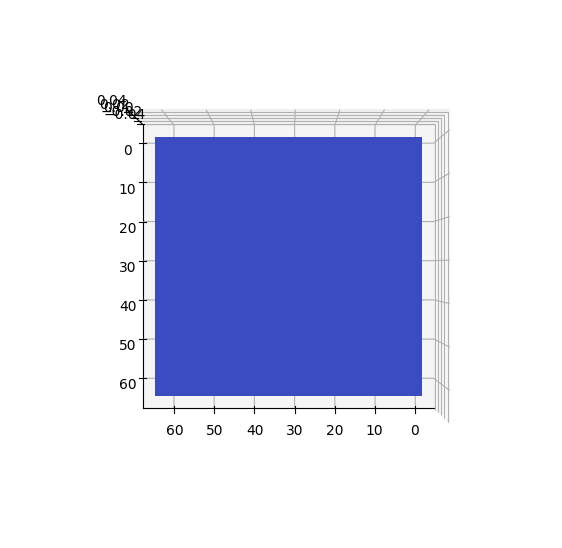

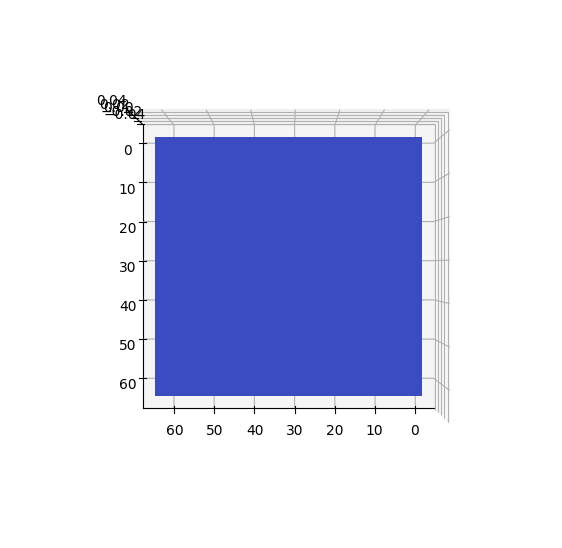

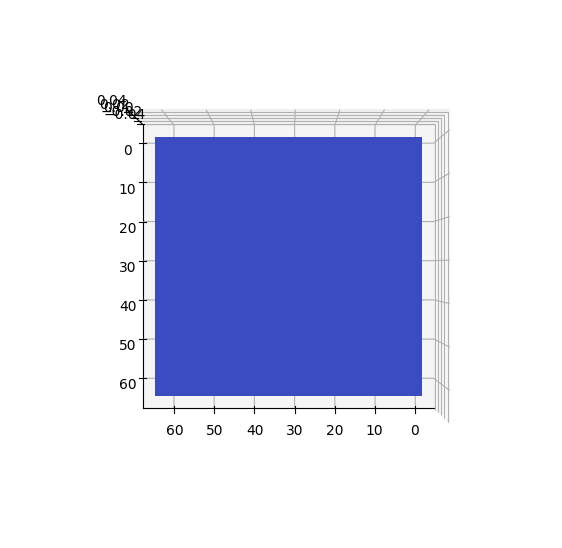

In [3]:
g = np.zeros((Nx,Ny)) # f0 derivative 2D vector

#reciprocal space vectors 
ghat = np.zeros((Nx,Ny))
phihat = np.zeros((Nx,Ny))

for m in range (0,30) : # outer-time loop
    
    for n in range (0,1) : # inner-time loop
        
        # evolving the f0 derivative
        for i in range (0,Nx):
            for j in range (0,Ny):
                
                g[i][j] = 2 * A * phi[i][j] * (1 - phi[i][j]) * (1 - 2*phi[i][j])
        # taking fourier transform
        ghat = np.fft.fft2(g)
        phihat = np.fft.fft2(phi)
        
        for i in range (0,Nx) :
            # implementing PBC for x axis
            if (i <= halfNx):
                kx = i * delkx 
            if (i > halfNx) :
                kx = (i-Nx) * delkx 
            
            for j in range (0,Ny) :
                # implementing PBC for y axis
                if (j <= halfNy):
                    ky = j * delky 
                if (j > halfNy) :
                    ky = (i-Ny) * delky 
                    
                k2 = kx*kx + ky*ky 
                # evolving the Allen - Cahn Equation
                phihat[i][j] = (phihat[i][j] - L * dt * ghat[i][j]) / (1 + 2 * kappa * k2 * L * dt)
        
        # taking inverse fourier transform
        phi = np.real(np.fft.ifft2(phihat))
    
    # plotting the final profile    
    fig = plt.figure(figsize=(7, 7), dpi=100)
    ax = fig.gca(projection='3d')
    surf2 = ax.plot_surface(X, Y, phi[:], cmap=cm.coolwarm)
    ax.view_init(90, 90)        